<a href="https://colab.research.google.com/github/QuangMinhHuynh/Facemask-Detection/blob/main/FinalProjectTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow as tf
import os
from google.colab import drive
from google.colab import auth

We want to create a machine learning model that can accurately identify whether or not a person is wearing a mask. We would also like to compare the accuracies of different model architectures on this specific problem.

The following few sections is the initial setup for the data and models


In [ ]:
batch_size = 40
img_height = 200 
img_width = 200 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
training = tf.keras.preprocessing.image_dataset_from_directory(
    'gdrive/MyDrive/data',
    validation_split = 0.2,
    subset = "training",
    seed=42, 
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 7553 files belonging to 2 classes.
Using 6043 files for training.


In [ ]:
testing = tf.keras.preprocessing.image_dataset_from_directory(
    'gdrive/MyDrive/data',
    validation_split = 0.2,
    subset = "validation",
    seed=42, 
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 7553 files belonging to 2 classes.
Using 1510 files for validation.


In [ ]:
classes = training.class_names
classes

['with_mask', 'without_mask']

In [ ]:
# Enhances performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training = training.cache().prefetch(buffer_size=AUTOTUNE)
testing = testing.cache().prefetch(buffer_size=AUTOTUNE)

Initial model primarily using Convolutional layers and pooling layers.

In [ ]:
model = models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255), # Need to rescale RGB values
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.GlobalAveragePooling2D(),
  layers.Dense(256, activation='relu'),
  layers.Dense(2, activation='softmax')                          
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
fitting = model.fit(training, validation_data=testing, epochs = 20)

Epoch 1/20
152/152 [==============================] - 1708s 11s/step - loss: 0.6387 - acc: 0.6224 - val_loss: 0.5552 - val_acc: 0.7285
Epoch 2/20
152/152 [==============================] - 7s 47ms/step - loss: 0.5457 - acc: 0.7396 - val_loss: 0.5165 - val_acc: 0.7603
Epoch 3/20
152/152 [==============================] - 7s 47ms/step - loss: 0.5191 - acc: 0.7500 - val_loss: 0.4873 - val_acc: 0.7675
Epoch 4/20
152/152 [==============================] - 7s 47ms/step - loss: 0.5045 - acc: 0.7578 - val_loss: 0.4704 - val_acc: 0.7702
Epoch 5/20
152/152 [==============================] - 7s 47ms/step - loss: 0.4635 - acc: 0.7813 - val_loss: 0.3960 - val_acc: 0.8159
Epoch 6/20
152/152 [==============================] - 7s 46ms/step - loss: 0.3865 - acc: 0.8333 - val_loss: 0.3183 - val_acc: 0.8715
Epoch 7/20
152/152 [==============================] - 7s 46ms/step - loss: 0.3493 - acc: 0.8546 - val_loss: 0.2872 - val_acc: 0.8874
Epoch 8/20
152/152 [==============================] - 7s 46ms/step 

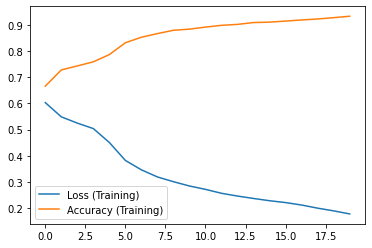

In [ ]:
plt.plot(fitting.history['loss'], label = 'Loss (Training)')
plt.plot(fitting.history['acc'], label = 'Accuracy (Training)')
plt.legend()

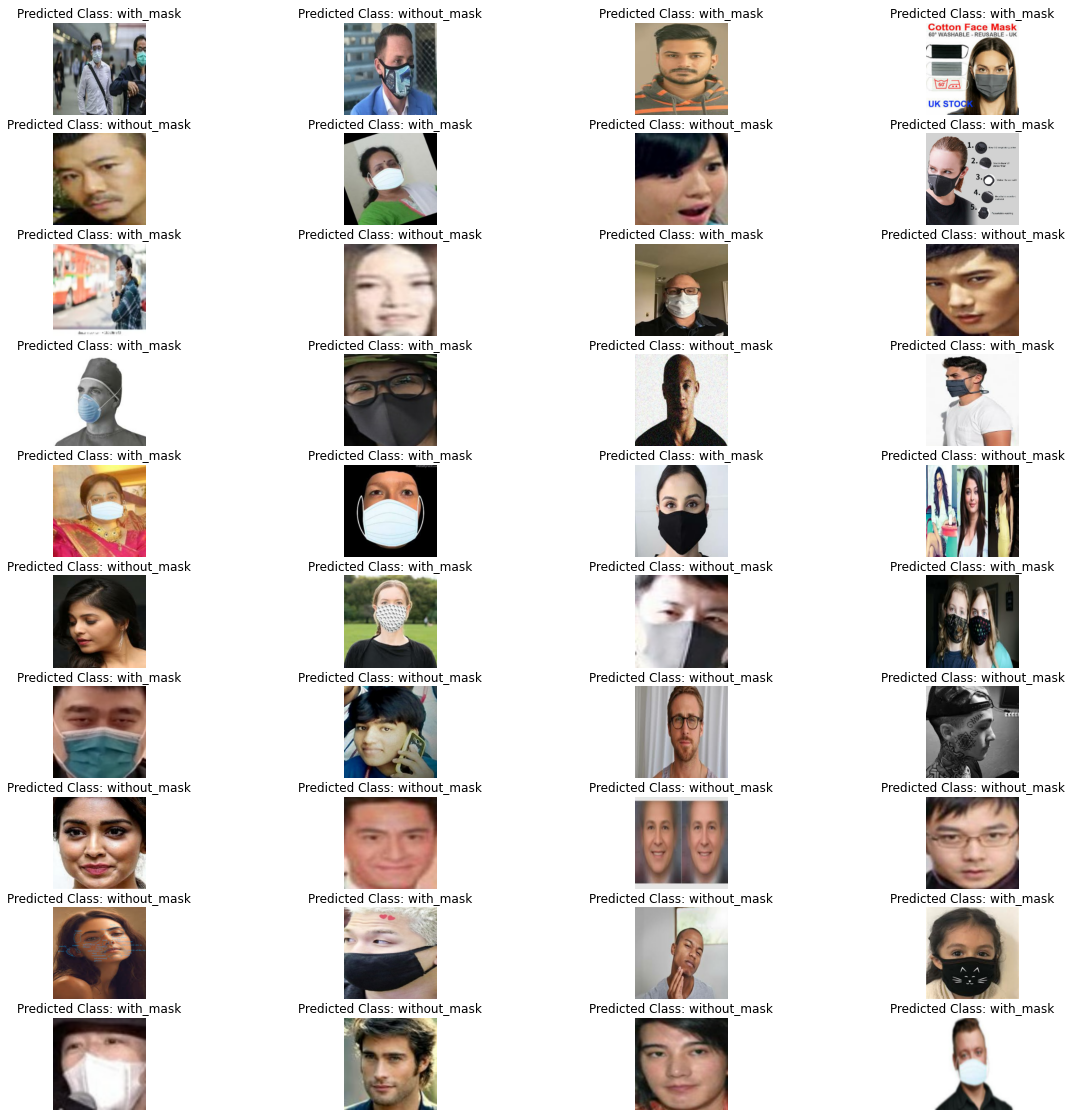

In [ ]:
plt.figure(figsize=(20,20))

for imgs, lbls in testing.take(1):
  predictions = model.predict(imgs)
  predicted_label = []

  for p in predictions:
    predicted_label.append(classes[np.argmax(p)])

  for i in range(40):
    ax = plt.subplot(10, 4, i+1)
    plt.imshow(imgs[i].numpy().astype('uint8'))
    plt.title('Predicted Class: ' + predicted_label[i])
    plt.axis('off')
    plt.grid(True)

Second model is nearly identical, however it using different pooling layers.

In [ ]:
model_2 = models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255), # Need to rescale RGB values
  layers.Conv2D(32, 3, input_shape=(200, 200, 3), activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.AveragePooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.AveragePooling2D(),
  layers.GlobalMaxPooling2D(),
  layers.Dense(256, activation='sigmoid'),
  layers.Dense(2, activation='softmax')                         
])

In [ ]:
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])


In [ ]:
fitting = model_2.fit(training, validation_data=testing, epochs = 20)

Epoch 1/20
152/152 [==============================] - 7s 45ms/step - loss: 0.6678 - acc: 0.5990 - val_loss: 0.5419 - val_acc: 0.7298
Epoch 2/20
152/152 [==============================] - 7s 44ms/step - loss: 0.5236 - acc: 0.7491 - val_loss: 0.3821 - val_acc: 0.8377
Epoch 3/20
152/152 [==============================] - 7s 44ms/step - loss: 0.3569 - acc: 0.8545 - val_loss: 0.2960 - val_acc: 0.8861
Epoch 4/20
152/152 [==============================] - 7s 44ms/step - loss: 0.2921 - acc: 0.8869 - val_loss: 0.3595 - val_acc: 0.8391
Epoch 5/20
152/152 [==============================] - 7s 44ms/step - loss: 0.2659 - acc: 0.8904 - val_loss: 0.3270 - val_acc: 0.8497
Epoch 6/20
152/152 [==============================] - 7s 45ms/step - loss: 0.2381 - acc: 0.9047 - val_loss: 0.1946 - val_acc: 0.9285
Epoch 7/20
152/152 [==============================] - 7s 45ms/step - loss: 0.1987 - acc: 0.9239 - val_loss: 0.1876 - val_acc: 0.9371
Epoch 8/20
152/152 [==============================] - 7s 44ms/step - 

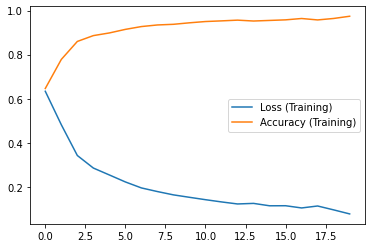

In [ ]:
plt.plot(fitting.history['loss'], label = 'Loss (Training)')
plt.plot(fitting.history['acc'], label = 'Accuracy (Training)')
plt.legend()

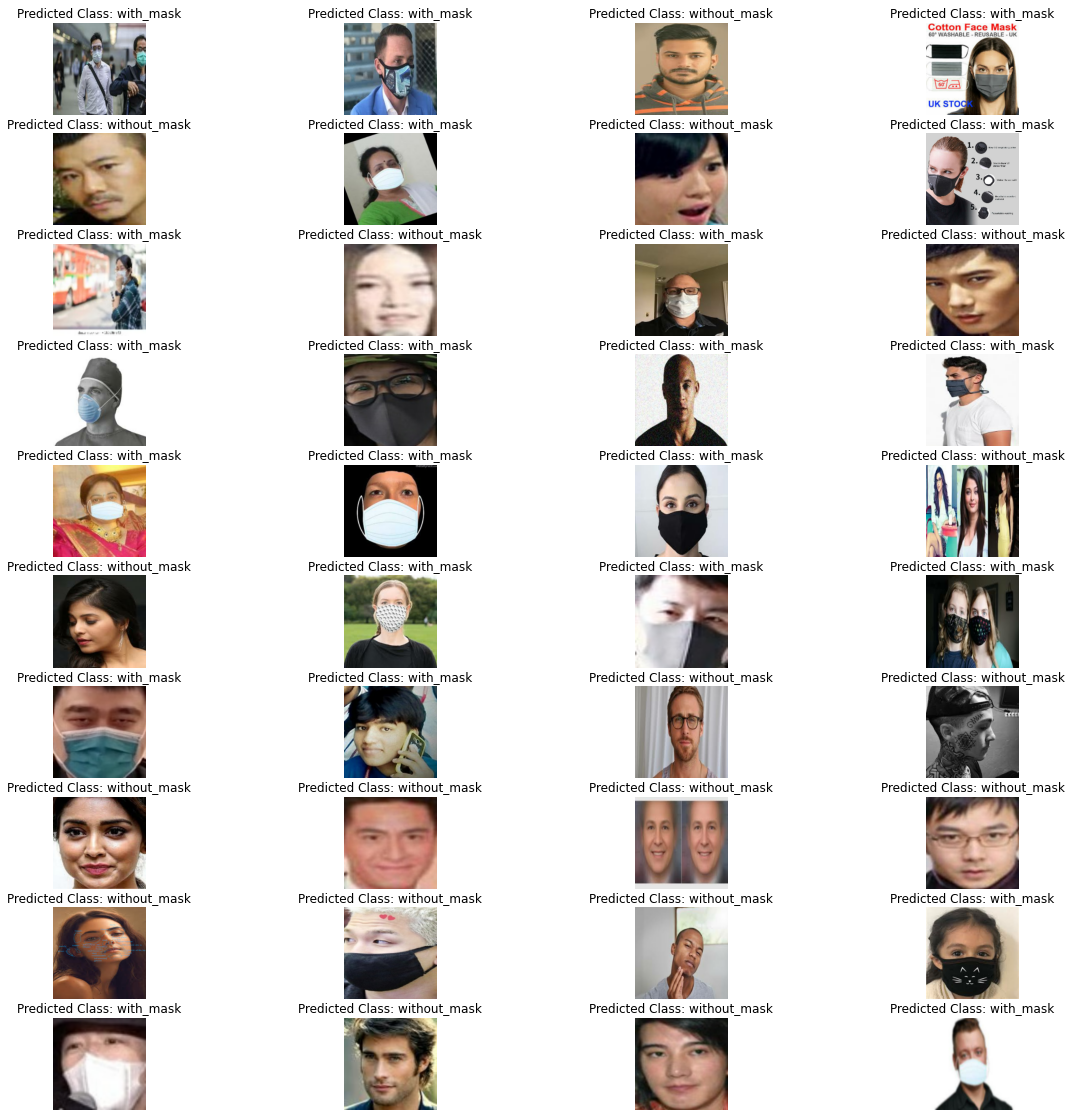

In [ ]:
plt.figure(figsize=(20,20))

for imgs, lbls in testing.take(1):
  predictions = model_2.predict(imgs)
  predicted_label = []

  for p in predictions:
    predicted_label.append(classes[np.argmax(p)])

  for i in range(40):
    ax = plt.subplot(10, 4, i+1)
    plt.imshow(imgs[i].numpy().astype('uint8'))
    plt.title('Predicted Class: ' + predicted_label[i])
    plt.axis('off')
    plt.grid(True)

The third model uses the PReLU activation function instead of ReLU

In [ ]:
model_3 = models.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255), # Need to rescale RGB values
  layers.Conv2D(32, 3, input_shape=(200, 200, 3), activation=layers.PReLU()),
  layers.AveragePooling2D(),
  layers.Conv2D(64, 3, activation=layers.PReLU()),
  layers.AveragePooling2D(),
  layers.Conv2D(128, 3, activation=layers.PReLU()),
  layers.AveragePooling2D(),
  layers.GlobalMaxPooling2D(),
  layers.Dense(256, activation='sigmoid'),
  layers.Dense(2, activation='softmax')                         
])

In [ ]:
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
fitting = model_3.fit(training, validation_data=testing, epochs = 20)

Epoch 1/20
152/152 [==============================] - 17s 109ms/step - loss: 0.6352 - acc: 0.6002 - val_loss: 0.4560 - val_acc: 0.8351
Epoch 2/20
152/152 [==============================] - 16s 108ms/step - loss: 0.3207 - acc: 0.8751 - val_loss: 0.2577 - val_acc: 0.8887
Epoch 3/20
152/152 [==============================] - 16s 107ms/step - loss: 0.2337 - acc: 0.9163 - val_loss: 0.2224 - val_acc: 0.9159
Epoch 4/20
152/152 [==============================] - 16s 107ms/step - loss: 0.2018 - acc: 0.9247 - val_loss: 0.1986 - val_acc: 0.9212
Epoch 5/20
152/152 [==============================] - 16s 108ms/step - loss: 0.1803 - acc: 0.9380 - val_loss: 0.1783 - val_acc: 0.9311
Epoch 6/20
152/152 [==============================] - 16s 107ms/step - loss: 0.1559 - acc: 0.9474 - val_loss: 0.1781 - val_acc: 0.9305
Epoch 7/20
152/152 [==============================] - 16s 108ms/step - loss: 0.1377 - acc: 0.9521 - val_loss: 0.1934 - val_acc: 0.9285
Epoch 8/20
152/152 [==============================] - 1

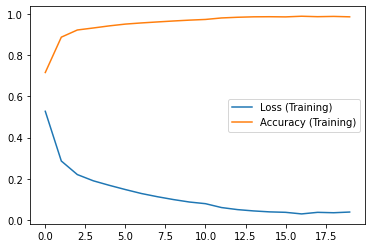

In [ ]:
plt.plot(fitting.history['loss'], label = 'Loss (Training)')
plt.plot(fitting.history['acc'], label = 'Accuracy (Training)')
plt.legend()

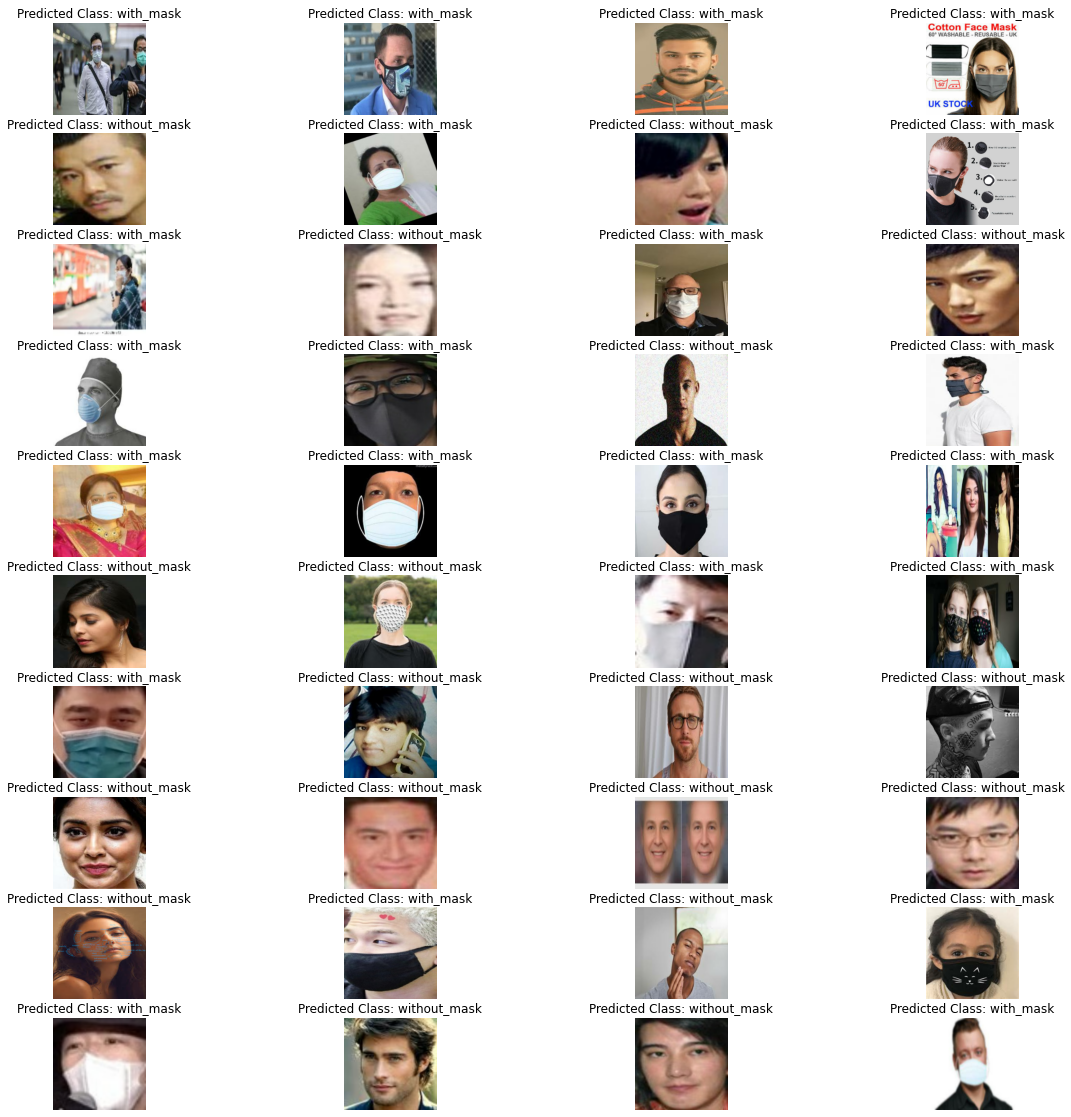

In [ ]:
plt.figure(figsize=(20,20))

for imgs, lbls in testing.take(1):
  predictions = model_3.predict(imgs)
  predicted_label = []

  for p in predictions:
    predicted_label.append(classes[np.argmax(p)])

  for i in range(40):
    ax = plt.subplot(10, 4, i+1)
    plt.imshow(imgs[i].numpy().astype('uint8'))
    plt.title('Predicted Class: ' + predicted_label[i])
    plt.axis('off')
    plt.grid(True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 128)       0

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
average_pooling2d (AveragePo (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
average_pooling2d_2 (Average (None, 23, 23, 128)      

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 198, 198, 32)      1255424   
_________________________________________________________________
average_pooling2d_3 (Average (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 97, 97, 64)        620672    
_________________________________________________________________
average_pooling2d_4 (Average (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 128)       344704    
_________________________________________________________________
average_pooling2d_5 (Average (None, 23, 23, 128)      